In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import random

In [23]:
# CIFAR-10 class names
class_names = [now explain the 
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

In [24]:
# Loading and preprocessing the image data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [25]:
# Normalizing the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [26]:
# Defining the model's architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [27]:
# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [28]:
# Compiling and training the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64)


Epoch 1/10
782/782 [==============================] - 11s 13ms/step - loss: 1.6795 - accuracy: 0.3837
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.3632 - accuracy: 0.5134
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.2293 - accuracy: 0.5615
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1420 - accuracy: 0.5961
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0780 - accuracy: 0.6186
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 1.0271 - accuracy: 0.6359
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9907 - accuracy: 0.6488
Epoch 8/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9513 - accuracy: 0.6638
Epoch 9/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9165 - accuracy: 0.6776
Epoch 10/10
782/782 [==============================] - 10s 13ms/step - loss: 0.889

In [30]:
# Estimating the model's performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 2ms/step - loss: 0.8962 - accuracy: 0.6901
Test Loss: 0.8961601853370667
Test Accuracy: 0.6901000142097473


In [38]:
# Show random image from the test set
n = random.randint(0, len(x_test)-1)  # random index
image = x_test[n]
true_label = y_test[n][0]  # Extracting the true label (as a scalar)

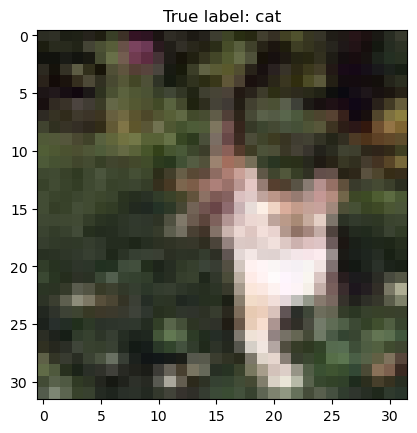

In [39]:
# Display the image
plt.imshow(image)
plt.title(f"True label: {class_names[true_label]}")
plt.show()

In [40]:
# Reshape the image for the model input (batch size of 1)
image = np.expand_dims(image, axis=0)

# Predict the class of the image
predicted_class = model.predict(image)
predicted_label = np.argmax(predicted_class, axis=1)[0]

# Display the predicted class
print(f"Predicted class: {class_names[predicted_label]}")

1/1 [==============================] - 0s 18ms/step
Predicted class: deer
